<a href="https://colab.research.google.com/github/ioannis-toumpoglou/pytorch-repo/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with PyTorch

Classification is the problem of predicting whether something is one thing or another (there can be multiple options).

## 1. Make classification data

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f'First 5 samples of X: {X[:5]}\n')
print(f'First 5 samples of y: {y[:5]}')

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 samples of y: [1 1 1 1 0]


In [5]:
# Make DataFrame of circle data
import pandas as pd

circles = pd.DataFrame({'X1': X[:, 0], 
                        'X2': X[:, 1],
                        'label': y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


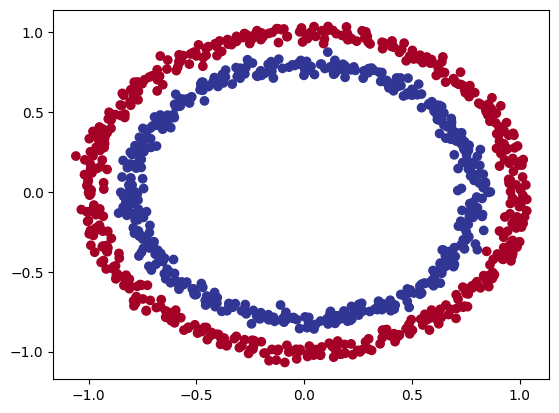

In [6]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

Note: The data is often referred to as 'toy dataset', because it is small enough to experiment, but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f'Values for one sample of X: {X_sample} and the same for y: {y_sample}')
print(f'Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}')

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [10]:
import torch

torch.__version__

'2.0.1+cu118'

In [11]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [14]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,  # 0.2 = 20% of data will be test & 80% will be train
                                                    random_state=42)

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Build a model to clasify the blue and red dots.

To do so:
1. Setup device agnostic code so that the code will run on an accelerator (GPU) if there is one
2. Construct a model_selection
3. Define a loss function and an optimizer
4. Creating a training and test loop

In [16]:
import torch
from torch import nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [17]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

After setting up the device agnostic code, a model will be created that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create two `nn.Linear()` layers that are capable of handling the shapes of the data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of the model class and send it to the target device

In [18]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create two nn.Linear layers capable of handling the shapes of the data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

  # 3. Define a forward method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(X))  # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of the model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
device

'cuda'

In [20]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [21]:
# Replicate the above model using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6304,  0.3407],
                      [-0.6742,  0.2413],
                      [ 0.1732, -0.6004],
                      [-0.6704,  0.2955],
                      [ 0.4049,  0.6046]], device='cuda:0')),
             ('0.bias',
              tensor([0.3945, 0.7055, 0.5606, 0.6279, 0.5973], device='cuda:0')),
             ('1.weight',
              tensor([[-0.3416,  0.0577, -0.1784,  0.2637,  0.4412]], device='cuda:0')),
             ('1.bias', tensor([0.2070], device='cuda:0'))])

In [23]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f'Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}')
print(f'Length of test samples: {len(X_test)}, Shape: {X_test.shape}')
print(f'\nFirst 10 predictions:\n {untrained_preds[:10]}')
print(f'\nFirst 10 labels:\n {y_test[:10]}')

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
 tensor([[0.7868],
        [0.7731],
        [0.5312],
        [0.8605],
        [0.0683],
        [0.0635],
        [0.3917],
        [0.2243],
        [0.5512],
        [0.7671]], device='cuda:0')

First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function and optimizer to use?

It is a problem specific decision!


For the **loss function**:

For **regression** the choices are MAE or MSE (Mean Absolute Error or Mean Squared Error).

For **classification** the choices are binary cross entropy or categorical cross entropy (cross entropy).

**Reminder**: the loss function measures how *wrong* the model's predictions are.


For the **optimizer**:

The most common choices are **SGD** and **Adam**, however PyTorch has many **built-in** options.


In [24]:
# Setup the loss function
# loss_fn = nn.BCELoss()  # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input in BCELoss
loss_fn = nn.BCEWithLogitsLoss()  # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [25]:
# Calculate accuracy - percentage of examples the model gets right
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## 3. Train model

To train the model a training loop is required:
1. Forward pass
2. Calculation of loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

The model's outputs are going to be raw **logits**.

These logits can be converted into **prediction probabilities** by passing them to an activation function (eg. sigmoid for binary classification and softmax for multiclass classification).

Then the model's prediction probabilities can be converted to **prediction labels** by either rounding them or by getting the `argmax()`.

In [26]:
# View the first 5 outputs of the forward pass on the test data
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[0.7868],
        [0.7731],
        [0.5312],
        [0.8605],
        [0.0683]], device='cuda:0')

In [27]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [28]:
# Use the sigmoid activation function on the model's logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)

y_pred_probs

tensor([[0.6872],
        [0.6842],
        [0.6298],
        [0.7028],
        [0.5171]], device='cuda:0')

For the prediction probability values, a range-style rounding is required:
* `y_pred_probs` >= 0.5 -> y = 1 (class 1)
* `y_pred_probs` < 0.5 -> y = 0 (class 0)

In [29]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [30]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [31]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits -> pred probs -> pred labels

  # 2. Calculate loss / accuracy
  # loss = loss_fn(torch.sigmoids(y_logits),  # nn.BCELoss expects prediction probabilities as input
  #                y_train)
  loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss / accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
    if epoch % 10 == 0:
      print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%')

Epoch: 0 | Loss: 0.72563, Acc: 51.88% | Test loss: 0.72861, Test acc: 54.00%
Epoch: 10 | Loss: 0.70269, Acc: 52.62% | Test loss: 0.70667, Test acc: 51.50%
Epoch: 20 | Loss: 0.69717, Acc: 51.62% | Test loss: 0.70099, Test acc: 49.00%
Epoch: 30 | Loss: 0.69548, Acc: 50.88% | Test loss: 0.69908, Test acc: 49.50%
Epoch: 40 | Loss: 0.69472, Acc: 50.50% | Test loss: 0.69816, Test acc: 50.50%
Epoch: 50 | Loss: 0.69426, Acc: 50.38% | Test loss: 0.69759, Test acc: 49.00%
Epoch: 60 | Loss: 0.69394, Acc: 50.62% | Test loss: 0.69717, Test acc: 48.50%
Epoch: 70 | Loss: 0.69371, Acc: 50.00% | Test loss: 0.69684, Test acc: 47.50%
Epoch: 80 | Loss: 0.69354, Acc: 50.38% | Test loss: 0.69657, Test acc: 48.50%
Epoch: 90 | Loss: 0.69341, Acc: 50.25% | Test loss: 0.69634, Test acc: 47.50%


## 4. Make predictions and evaluate the model

From the metrics it looks like that the model is not learning anything.

To inspect it, some predictions and a viasualization of them is required.

In [41]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists')
else:
  print('Downloading helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')

  with open('helper_functions.py', 'wb') as file:
    file.write(request.content)


from helper_functions import plot_predictions, plot_decision_boundary

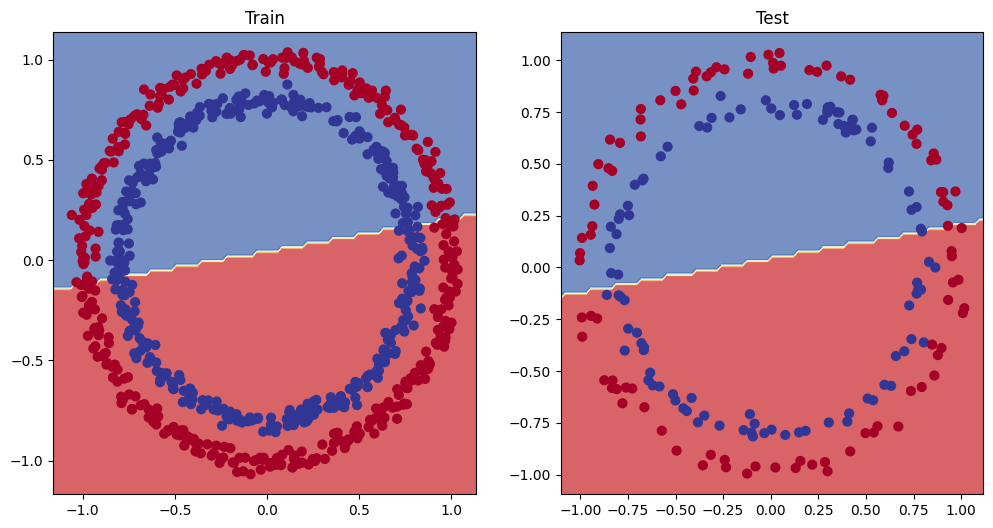

In [42]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_0, X_test, y_test)